In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
# install apyori package
!pip install apyori

In [2]:
from apyori import apriori # Association Rule Mining

In [3]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(7501, 20)

# Data-preprocessing

In [5]:
transaction = []

for i in range(0,7501):
    transaction.append([str(dataset.values[i, j]) for j in range(0,20)])
    
transaction = np.array(transaction)

In [6]:
print(transaction.shape)
print("**************************")
print(transaction[0:20])

(7501, 20)
**************************
[['shrimp' 'almonds' 'avocado' 'vegetables mix' 'green grapes'
  'whole weat flour' 'yams' 'cottage cheese' 'energy drink'
  'tomato juice' 'low fat yogurt' 'green tea' 'honey' 'salad'
  'mineral water' 'salmon' 'antioxydant juice' 'frozen smoothie'
  'spinach' 'olive oil']
 ['burgers' 'meatballs' 'eggs' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['turkey' 'avocado' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['mineral water' 'milk' 'energy bar' 'whole wheat rice' 'green tea'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan']
 ['low fat yogurt' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'na

In [7]:
from wordcloud import WordCloud

In [14]:
wordcloud = WordCloud(width=1000, height=1000, max_words=20).generate(transaction)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Popular Items bought by customers", fontsize=35)
plt.show()

TypeError: expected string or bytes-like object

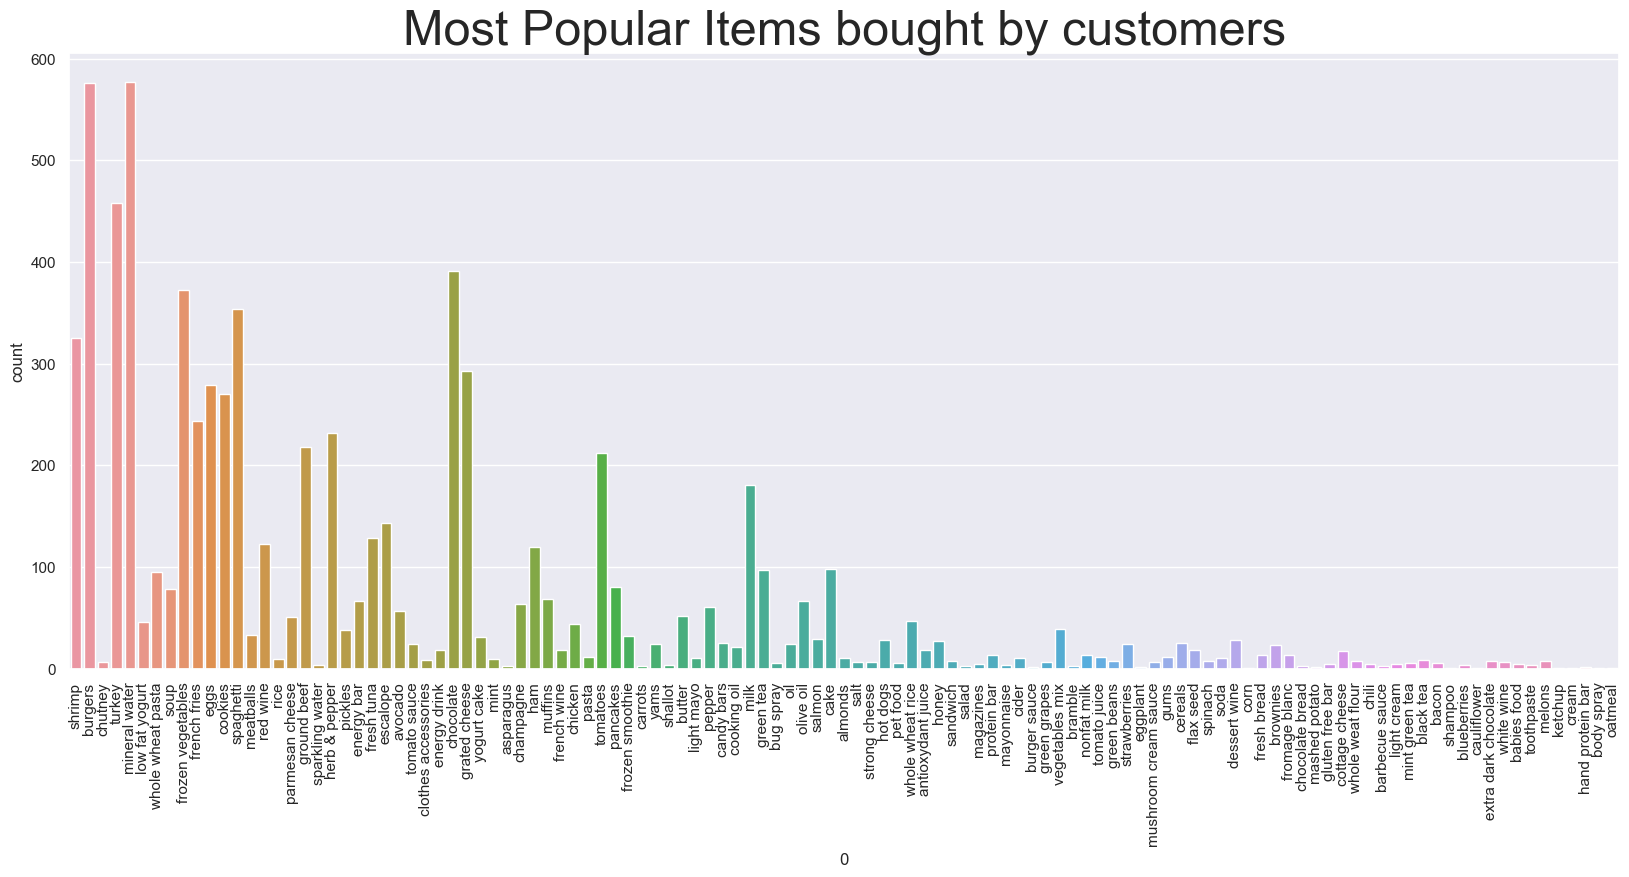

In [8]:
plt.rcParams['figure.figsize'] = (20,8)
sns.countplot(dataset[0])
plt.title("Most Popular Items bought by customers", fontsize=35)
plt.xticks(rotation= 90)
plt.show()


# Building Association Rule Mining

In [9]:
transaction = list(transaction)
rules = apriori(transaction, min_support=0.01, min_confidence=0.2, min_lift = 2, min_lenght=2)

In [10]:
rules

<generator object apriori at 0x0000018D113FA040>

In [11]:
results = list(rules)
results

[RelationRecord(items=frozenset({'shrimp', 'frozen vegetables'}), support=0.01666444474070124, ordered_statistics=[OrderedStatistic(items_base=frozenset({'shrimp'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23320895522388058, lift=2.44657394843962)]),
 RelationRecord(items=frozenset({'tomatoes', 'frozen vegetables'}), support=0.0161311825089988, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomatoes'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23586744639376217, lift=2.4744639376218323)]),
 RelationRecord(items=frozenset({'ground beef', 'grated cheese'}), support=0.011331822423676844, ordered_statistics=[OrderedStatistic(items_base=frozenset({'grated cheese'}), items_add=frozenset({'ground beef'}), confidence=0.2162849872773537, lift=2.201294015695292)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=fro